In [1]:
# navigate to http://openinsider.com/ and click through to insider who is selling
# copy & paste url below

In [2]:
# URL from openinsider
# insider = 'Joe Gebbia'
# url = 'http://openinsider.com/insider/Gebbia-Joseph/1834171'

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# URL from http://openinsider.com/
insider = 'Saylor'
url = 'http://openinsider.com/screener?s=&o=1079782&pl=&ph=&ll=&lh=&fd=1461&fdr=&td=0&tdr=&fdlyl=&fdlyh=&daysago=&xp=1&xs=1&vl=&vh=&ocl=&och=&sic1=-1&sicl=100&sich=9999&grp=0&nfl=&nfh=&nil=&nih=&nol=&noh=&v2l=&v2h=&oc2l=&oc2h=&sortcol=0&cnt=500&page=1'
print (f'fetching insider trades for {insider} at ' + url + '...\n')

fetching insider trades for Saylor at http://openinsider.com/screener?s=&o=1079782&pl=&ph=&ll=&lh=&fd=1461&fdr=&td=0&tdr=&fdlyl=&fdlyh=&daysago=&xp=1&xs=1&vl=&vh=&ocl=&och=&sic1=-1&sicl=100&sich=9999&grp=0&nfl=&nfh=&nil=&nih=&nol=&noh=&v2l=&v2h=&oc2l=&oc2h=&sortcol=0&cnt=500&page=1...



In [5]:
# there are multiple tables on the webpage
# stock sales info is on table 11

payload=pd.read_html(url)
table = payload[11]
df = table
df = df[::-1]

pd.set_option("display.precision", 2)
# df.columns.values

In [6]:
df.rename(columns = {'Filing\xa0Date':'Filing Date', 'Trade\xa0Date':'Trade Date', 'Insider\xa0Name':'Insider Name', 'Trade\xa0Type':'Trade Type', 'ΔOwn':'Delta Owned'}, inplace = True)
df = df.drop(["X", "1d", "1w", "1m", "6m"], axis=1)
# df.dtypes

In [7]:
df.tail()

,Filing Date,Trade Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,Delta Owned,Value
4,2024-03-08 16:46:43,2024-03-07,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,"$1,278.83",-5000,0,-100%,"-$6,394,133"
3,2024-03-11 16:10:11,2024-03-08,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,"$1,352.40",-3950,1050,-79%,"-$5,341,971"
2,2024-03-11 16:11:02,2024-03-08,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,"$1,415.05",-1050,0,-100%,"-$1,485,801"
1,2024-03-12 16:35:13,2024-03-11,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,"$1,534.86",-2182,2818,-44%,"-$3,349,069"
0,2024-03-12 16:36:04,2024-03-11,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,"$1,607.70",-2818,0,-100%,"-$4,530,501"


In [8]:
df['Price'] = df['Price'].str.strip('$')
df['Price'] = df['Price'].replace( '[\$,)]','', regex=True)
df['Value'] = df['Value'].replace( '[\$,)]','', regex=True)
df['Delta Owned'] = df['Delta Owned'].str.strip('%')
df['Price'] = pd.to_numeric(df['Price'])
df['Qty'] = pd.to_numeric(df['Qty'])
df['Owned'] = pd.to_numeric(df['Owned'])
df['Delta Owned'] = pd.to_numeric(df['Delta Owned'])
df['Delta Owned'] = df['Delta Owned'] / 100
df['Value'] = pd.to_numeric(df['Value'])
df['Proceeds'] = df['Value']*-1 
df['Total Sales'] = df['Proceeds'].cumsum()
df['Trade Date'] = pd.to_datetime(df['Trade Date'])
df['Date'] = pd.to_datetime(df['Trade Date'])
df.set_index('Trade Date', inplace = True)
df.tail(10)

,Filing Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,Delta Owned,Value,Proceeds,Total Sales,Date
Trade Date,,,,,,,,,,,,,
2024-03-05,2024-03-06 16:04:43,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1146.19,-2937,2063,-0.59,-3366371,3366371,138259430,2024-03-05
2024-03-05,2024-03-06 16:05:18,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1259.56,-2063,0,-1.00,-2598478,2598478,140857908,2024-03-05
2024-03-06,2024-03-07 16:08:00,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1164.11,-1799,3201,-0.36,-2094240,2094240,142952148,2024-03-06
2024-03-06,2024-03-07 16:09:06,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1235.29,-1675,1526,-0.52,-2069110,2069110,145021258,2024-03-06
2024-03-06,2024-03-07 16:10:01,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1262.67,-1526,0,-1.00,-1926833,1926833,146948091,2024-03-06
2024-03-07,2024-03-08 16:46:43,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1278.83,-5000,0,-1.00,-6394133,6394133,153342224,2024-03-07
2024-03-08,2024-03-11 16:10:11,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1352.40,-3950,1050,-0.79,-5341971,5341971,158684195,2024-03-08
2024-03-08,2024-03-11 16:11:02,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1415.05,-1050,0,-1.00,-1485801,1485801,160169996,2024-03-08
2024-03-11,2024-03-12 16:35:13,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1534.86,-2182,2818,-0.44,-3349069,3349069,163519065,2024-03-11


In [9]:
last_sale = df['Value'].iloc[-1]  # Get the last value in the 'Value' column
print(f'Last stock sale was for ${last_sale:,.0f}')

Last stock sale was for $-4,530,501


In [10]:
ticker = df['Ticker'].values[0]
print(f'fetching {ticker} data')
stock_df = yf.download(ticker)
stock_df = stock_df.drop(columns=['Open','High','Low','Close','Volume'], axis=1)
todays_price = stock_df['Adj Close'].values[-1].round(2)
print(f'yesterdays closing price was ${todays_price}')

fetching MSTR data
[*********************100%***********************]  1 of 1 completed
yesterdays closing price was $1593.35


In [11]:
# merging the two datasets
df = pd.merge(df, stock_df, left_index=True, right_index=True)

In [12]:
df['pX_since'] = todays_price - df['Price']
df['%ch_since'] = (df['pX_since']/df['Price'])*100

In [13]:
# separating out buys and sells into their own dataframes
sells_df = df[df['Proceeds'] > 0]
sells_df['Total Sales'] = sells_df['Proceeds'].cumsum()

In [14]:
# sells_df.tail()

In [15]:
total_sales = df['Total Sales'].iloc[-1]  # Get the last value in the 'Value' column
print(f'{insider} total sales: ${total_sales:,.0f}')

Saylor total sales: $168,049,566


In [16]:
# buys_df = df[df['Proceeds'] < 0]
# buys_df['Proceeds'] = buys_df['Value']
# buys_df['Total Sales'] = buys_df['Proceeds'].cumsum()
# buys_df['Value Now'] = buys_df['Value'] * buys_df['%ch_since']
# # buys_df.tail()

In [17]:
date_labels = sells_df['Date'].tolist()

# Filter the DataFrame for the current year
current_year = datetime.now().year
ytd_df = sells_df[sells_df["Date"].dt.year == current_year]

# Calculate the sum of the "proceeds" column for the YTD period
ytd_proceeds = ytd_df["Proceeds"].sum().round(0)
print(f'{insider} YTD sales = ${ytd_proceeds:,.0f}')

Saylor YTD sales = $168,049,566


In [18]:
ytd_df.tail()

,Filing Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,Delta Owned,Value,Proceeds,Total Sales,Date,Adj Close,pX_since,%ch_since
2024-03-07,2024-03-08 16:46:43,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1278.83,-5000,0,-1.00,-6394133,6394133,153342224,2024-03-07,1300.02,314.52,24.59
2024-03-08,2024-03-11 16:10:11,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1352.40,-3950,1050,-0.79,-5341971,5341971,158684195,2024-03-08,1425.59,240.95,17.82
2024-03-08,2024-03-11 16:11:02,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1415.05,-1050,0,-1.00,-1485801,1485801,160169996,2024-03-08,1425.59,178.30,12.60
2024-03-11,2024-03-12 16:35:13,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1534.86,-2182,2818,-0.44,-3349069,3349069,163519065,2024-03-11,1484.23,58.49,3.81
2024-03-11,2024-03-12 16:36:04,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1607.70,-2818,0,-1.00,-4530501,4530501,168049566,2024-03-11,1484.23,-14.35,-0.89


In [19]:
# total_sales_df = sells_df[['Total Sales']]
# total_sales_df.plot(kind='bar', stacked=True).set(title=f'{insider} Cumulative {ticker} Sales')
# plt.ylabel('Total Sales')

# # date_labels = sells_df.index.strftime('%Y-%m-%d').tolist()
# # ax.set_xticks(range(len(date_labels)))
# # ax.set_xticklabels(date_labels, rotation=90)

# plt.style.use('seaborn-darkgrid')

In [20]:
# proceeds_df = sells_df[['Proceeds']]  # Select the 'Proceeds' column
# ax = proceeds_df.plot(kind='bar', stacked=True)
# ax.set_title(f'{insider} Cumulative {ticker} Proceeds')  # Update the title
# ax.set_ylabel('Proceeds')  # Update the y-axis label

# date_labels = sells_df.index.strftime('%Y-%m-%d').tolist()
# ax.set_xticks(range(len(date_labels)))
# ax.set_xticklabels(date_labels, rotation=45)  # Adjust the rotation angle for readability

# plt.style.use('seaborn-darkgrid')
# plt.show()  # Add this line to display the plot

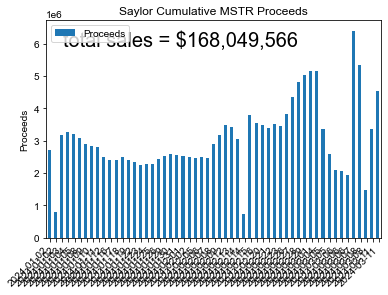

In [21]:
# Assuming 'insider' and 'ticker' are defined elsewhere in your code
proceeds_df = sells_df[['Proceeds']]  # Select the 'Proceeds' column
ax = proceeds_df.plot(kind='bar', stacked=True)
ax.set_title(f'{insider} Cumulative {ticker} Proceeds')  # Update the title
ax.set_ylabel('Proceeds')  # Update the y-axis label

date_labels = sells_df.index.strftime('%Y-%m-%d').tolist()
ax.set_xticks(range(len(date_labels)))
ax.set_xticklabels(date_labels, rotation=45, ha='right')  # Adjust the rotation angle for readability

# Calculate offset for aligning dates with the center of each bar
bar_width = 0.35  # Assuming default bar width
ax.set_xticks([i + bar_width/2 for i in range(len(date_labels))])
ax.set_xticklabels(date_labels)

# adding total sales as text to the plot
ax.text(0.05, 0.95, f'total sales = ${total_sales:,.0f}',
        transform=ax.transAxes, fontsize=20, ha='left', va='top')

plt.style.use('seaborn-darkgrid')
plt.show()  # Add this line to display the plot


In [22]:
sells_df.tail()

,Filing Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,Delta Owned,Value,Proceeds,Total Sales,Date,Adj Close,pX_since,%ch_since
2024-03-07,2024-03-08 16:46:43,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1278.83,-5000,0,-1.00,-6394133,6394133,153342224,2024-03-07,1300.02,314.52,24.59
2024-03-08,2024-03-11 16:10:11,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1352.40,-3950,1050,-0.79,-5341971,5341971,158684195,2024-03-08,1425.59,240.95,17.82
2024-03-08,2024-03-11 16:11:02,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1415.05,-1050,0,-1.00,-1485801,1485801,160169996,2024-03-08,1425.59,178.30,12.60
2024-03-11,2024-03-12 16:35:13,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale+OE,1534.86,-2182,2818,-0.44,-3349069,3349069,163519065,2024-03-11,1484.23,58.49,3.81
2024-03-11,2024-03-12 16:36:04,MSTR,Saylor Michael J,"Exec COB, 10%",S - Sale,1607.70,-2818,0,-1.00,-4530501,4530501,168049566,2024-03-11,1484.23,-14.35,-0.89


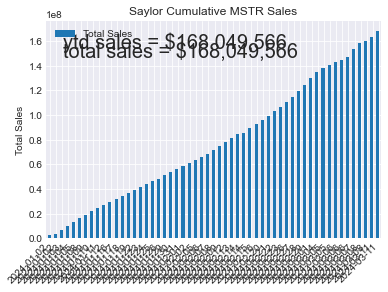

In [23]:
# Assuming 'insider' and 'ticker' are defined elsewhere in your code
total_sales_df = sells_df[['Total Sales']]
ax = total_sales_df.plot(kind='bar', stacked=True)
ax.set_title(f'{insider} Cumulative {ticker} Sales')
ax.set_ylabel('Total Sales')

date_labels = sells_df.index.strftime('%Y-%m-%d').tolist()
ax.set_xticks(range(len(date_labels)))
ax.set_xticklabels(date_labels, rotation=45, ha='right')  # Adjust the rotation angle for readability

# Calculate offset for aligning dates with the center of each bar
bar_width = 0.35  # Assuming default bar width
ax.set_xticks([i + bar_width/2 for i in range(len(date_labels))])
ax.set_xticklabels(date_labels)

# Add YTD sales as text inside the plot
ytd_proceeds_str = '${:,.0f}'.format(ytd_proceeds)
ax.text(0.05, 0.95, f'ytd sales = {ytd_proceeds_str}',
        transform=ax.transAxes, fontsize=20, ha='left', va='top')
# adding total sales as text inside the plot
ax.text(0.05, 0.90, f'total sales = ${total_sales:,.0f}',
        transform=ax.transAxes, fontsize=20, ha='left', va='top')

plt.style.use('seaborn-darkgrid')
# plt.show()  # Add this line to display the plot


In [24]:
# total_sales_df = sells_df[['Total Sales']]
# ax = total_sales_df.plot(kind='bar', stacked=True)
# ax.set_title(f'{insider} Cumulative {ticker} Sales')
# ax.set_ylabel('Total Sales')

# date_labels = sells_df.index.strftime('%Y-%m-%d').tolist()
# ax.set_xticks(range(len(date_labels)))
# ax.set_xticklabels(date_labels, rotation=45)  # Adjust the rotation angle for readability

# plt.style.use('seaborn-darkgrid')
# plt.show()  # Add this line to display the plot

In [25]:
# plotting total sales another way

# # Assuming you have a DataFrame named sells_df with a column 'Total Sales'
# total_sales_df = sells_df[['Total Sales']]

# # Create a line chart
# ax = total_sales_df.plot(kind='line')

# ax.set_title(f'{insider} Cumulative {ticker} Sales')
# ax.set_ylabel('Total Sales')

# # Remove x-axis labels and ticks
# ax.set_xticks([])

# plt.style.use('seaborn-darkgrid')
# plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_27480\846109855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['20-day MA'] = plot_df['Adj Close'].rolling(window=20).mean()


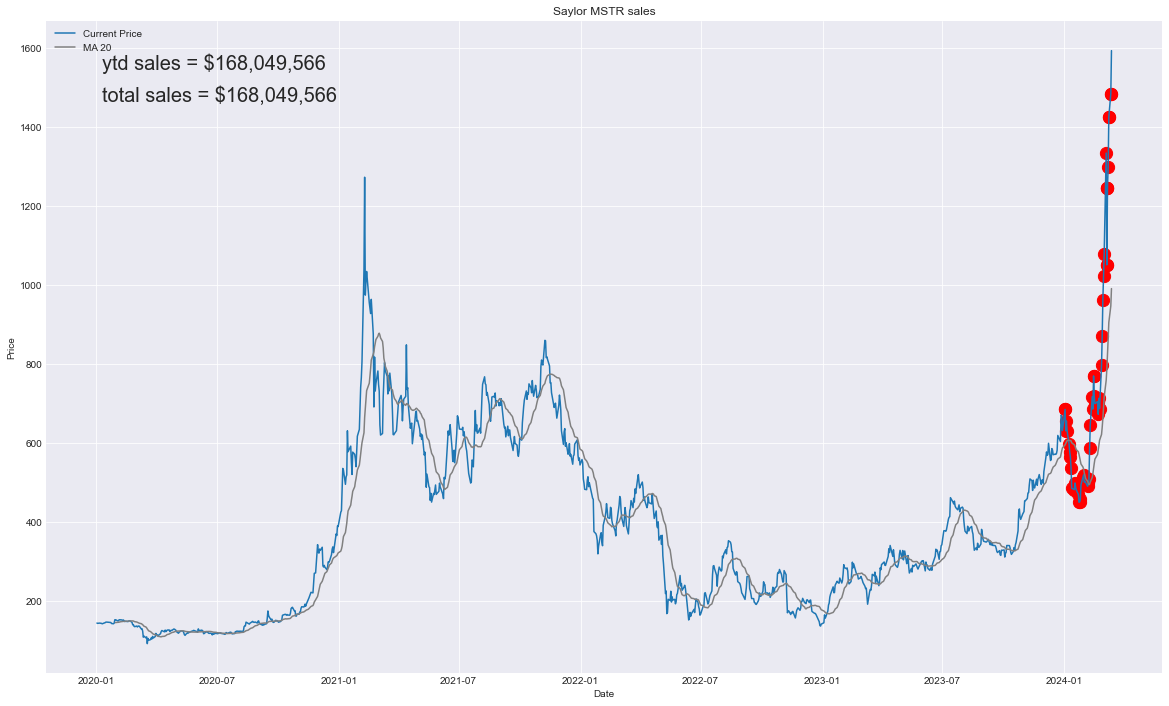

In [29]:
# changes default plot size for matplotlib
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = [20, 12]

# new plot_df for line-on-close stock chart used below
plot_df = stock_df.loc['2020-1-1':]
sells_df2 = sells_df.loc['2020-1-1':]   

# calculate the 20-day moving average
plot_df['20-day MA'] = plot_df['Adj Close'].rolling(window=20).mean()

# line on close chart and moving average
ax = plt.gca()
ax.plot(plot_df['Adj Close'], label='Current Price') # set the label for the current price
ax.plot(plot_df['20-day MA'], color='gray', label='MA 20') # set the label for the moving average

# gap downs that fill overlay
ax.scatter(x=sells_df2['Date'], y=sells_df2['Adj Close'], color='red', s=150)


# Add YTD sales as text inside the plot
ytd_proceeds_str = '${:,.0f}'.format(ytd_proceeds)
ax.text(0.05, 0.95, f'ytd sales = {ytd_proceeds_str}',
        transform=ax.transAxes, fontsize=20, ha='left', va='top')
# adding total sales as text inside the plot
ax.text(0.05, 0.90, f'total sales = ${total_sales:,.0f}',
        transform=ax.transAxes, fontsize=20, ha='left', va='top')

# setting titles and legend
plt.title(f"{insider} {ticker} sales")
plt.xlabel('Date')
plt.ylabel('Price')
ax.legend()

plt.show() # Display the plot

In [32]:
# import plotly.graph_objects as go
# import pandas as pd

# # Create figure
# fig = go.Figure()

# # Add trace for current price
# fig.add_trace(go.Scatter(x=plot_df.index, y=plot_df['Adj Close'], mode='lines', name='Current Price'))

# # Add trace for 20-day moving average
# fig.add_trace(go.Scatter(x=plot_df.index, y=plot_df['20-day MA'], mode='lines', name='MA 20', line=dict(color='gray')))

# # Add trace for gap downs that fill overlay
# fig.add_trace(go.Scatter(x=sells_df2['Date'], y=sells_df2['Adj Close'], mode='markers', name='stock sale', marker=dict(color='red', size=5)))

# # Update layout
# fig.update_layout(title=f"{insider} {ticker} Sales",
#                   xaxis_title='Date',
#                   yaxis_title='Price',
#                   legend=dict(x=0, y=1, traceorder='normal'))

# # Show figure
# fig.show()